In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a df with the data from Kaggle dataset
kaggle = pd.read_csv('vgsales.csv')

In [3]:
kaggle = kaggle.drop(columns=['Platform', 'Year', 'NA_Sales', 
                              'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Genre'])

In [4]:
kaggle = kaggle.rename(columns={'Name':'name'})

In [5]:
kaggle=kaggle.drop_duplicates(subset='name',keep='first')

In [6]:
df = pd.read_csv('items_sgames_4.csv')
df.head()

,_type,critic_review,genre,name,platform,ratings,release_date,total_sales,url
0,dict,NaN,<p>Role-Playing</p>,Pokémon Heart Gold / Soul Silver Version,DS,"<center> <img src=""http://www.vgchartz.com/ga...",03/14/10,<b>11.78m</b>,http://www.vgchartz.com/game/34267/pokemon-hea...
1,dict,NaN,<p>Simulation</p>,The Sims 3,PC,"<center> <img src=""http://www.vgchartz.com/ga...",06/02/09,<b>7.96m</b>,http://www.vgchartz.com/game/17805/the-sims-3/...
2,dict,NaN,"<p><a href=""/games/game.php?id=82917"">PC</a>, ...",FIFA 15,PS4,"<center> <img src=""http://www.vgchartz.com/ga...",09/23/14,<b>6.31m</b>,http://www.vgchartz.com/game/82916/fifa-15/?re...
3,dict,NaN,<p>Action</p>,Saints Row 2,X360,"<center> <img src=""http://www.vgchartz.com/ga...",10/14/08,<b>3.07m</b>,http://www.vgchartz.com/game/13813/saints-row-...
4,dict,NaN,<p>Platform</p>,Ratchet & Clank: Up Your Arsenal,PS2,"<center> <img src=""http://www.vgchartz.com/ga...",11/03/04,<b>2.57m</b>,http://www.vgchartz.com/game/6406/ratchet-amp-...


# Cleaning scraped data

In [7]:
#cleaning df content
#genre
df['genre'] = df['genre'].apply(lambda x: x.replace('<p>',''))
df['genre'] = df['genre'].apply(lambda x: x.replace('</p>',''))
# random column that appeared
df = df.drop(columns=['_type'])
#total_sales
df['total_sales'] = df['total_sales'].apply(lambda x: x.replace('<b>',''))
df['total_sales'] = df['total_sales'].apply(lambda x: x.replace('</b>',''))

In [8]:
# Cleaning Rating data
df['ratings'] = df['ratings'].fillna(0)
df['ratings'] = df['ratings'].astype(str)

In [9]:
df['ratings'] = df['ratings'].apply(lambda x: x.replace('<center>  <img src="',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace('" height="65" align="middle">\xa0  <img src="',';'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace('" height="65" align="middle">\xa0  </center>',''))

df['ratings'] = df['ratings'].apply(lambda x: x.replace('" height="65" align="middle">\xc2\xa0  <img src="',';'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace('" height="65" align="middle">\xc2\xa0  </center>',';'))

In [10]:
#CERO
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/cero/CERO_a.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/cero/CERO_b.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/cero/CERO_c.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/cero/CERO_d.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/cero/CERO_z.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/cero/CERO_rp.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/cero/CERO_statistical.png',''))


#PEGI
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/pegi/PEGI_3.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/pegi/PEGI_18.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/pegi/PEGI_12.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/pegi/PEGI_16.png',''))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/pegi/PEGI_7.png',''))

In [11]:
#ESRB
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/esrb/ESRB_e.png','E'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/esrb/ESRB_ec.png','EC'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/esrb/ESRB_e10.png','E10'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/esrb/ESRB_t.png','T'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/esrb/ESRB_m.png','M'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/esrb/ESRB_ao.png','AO'))
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    'http://www.vgchartz.com/games/images/ratings/esrb/ESRB_rp.png','RP'))

In [12]:
df['ratings'] = df['ratings'].apply(lambda x: x.replace(
    ';',''))
# df['ratings'].unique()

In [13]:
# drop row if release_date is invalid
df = df[df.release_date != '(Add Date)']
df = df[df.release_date != 'Cancelled']
df = df[df.release_date != 'TBA']
# formate release_date column
from datetime import datetime
df['release_date'] = df['release_date'].apply(lambda x: 
                                              datetime.strptime(x, '%m/%d/%y'))

In [14]:
# create column 'date', with distance of the release date and today
today = datetime.today()
df['time_delta'] = df['release_date'].apply(lambda x: (today-x).days)

In [15]:
# eliminate m and transform the total_sales column into value
df['total_sales'] = df['total_sales'].apply(lambda x: x[:-1])
df['total_sales'] = df['total_sales'].apply(lambda x: float(x))

In [16]:
#drop url column, not necessary
df = df.drop(columns=['url'])

In [17]:
#eliminate rows with invalid data for genre
df['GeCheck'] = df['genre'].apply(lambda x: x[:4])
df = df[df['GeCheck'] != '<a h']
df = df[df['GeCheck'] != '<img']
df = df.drop(columns=['GeCheck'])

In [18]:
#drop critic review cause we don't have a significant amount of values populated
df = df.drop(columns=['critic_review'])

In [19]:
df['year'] = df['release_date'].apply(lambda x: x.year)
df['month'] = df['release_date'].apply(lambda x: x.month)

In [20]:
#eliminate rows with no genre
df = df[df['genre'] != '\n        ']

In [21]:
genre_sales = df.groupby(['genre']).total_sales.sum().reset_index()
count_games_genre = df.groupby(['genre']).name.count().reset_index()
genre_sales = genre_sales.merge(count_games_genre, left_on='genre', right_on='genre', how='outer')
genre_sales['game_count'] = genre_sales['name']
genre_sales = genre_sales.drop(columns=['name'])
genre_sales['average_sales_per_game'] = genre_sales['total_sales']/genre_sales['game_count']
genre_sales = genre_sales.sort_values('average_sales_per_game', ascending=False)
# genre_sales

In [22]:
df = df[df['platform'] != 'PC']

In [23]:
df.to_csv('df_scrapy.csv')

In [24]:
df=df.merge(kaggle,on='name', how='left')

In [25]:
df = df.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a217f28>]],
      dtype=object)

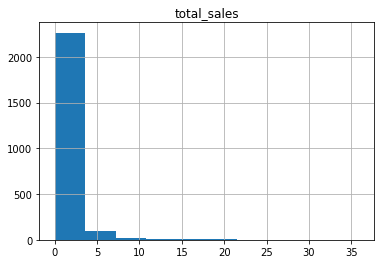

In [26]:
df.hist(column=['total_sales'])

In [27]:
from numpy import log
df['log_total_sales'] = log(df['total_sales'].apply(lambda x: x+1))
df.head()

,genre,name,platform,ratings,release_date,total_sales,time_delta,year,month,Rank,Publisher,log_total_sales
1,Action,Saints Row 2,X360,M,2008-10-14,3.07,3653,2008,10,462.0,THQ,1.403643
2,Platform,Ratchet & Clank: Up Your Arsenal,PS2,T,2004-11-03,2.57,5094,2004,11,598.0,Sony Computer Entertainment,1.272566
3,Action,Dynasty Warriors 4,PS2,T,2003-03-25,2.11,5683,2003,3,785.0,Tecmo Koei,1.134623
4,Sports,Tony Hawk's Pro Skater,N64,E,2000-02-29,2.11,6803,2000,2,203.0,Activision,1.134623
5,Role-Playing,Super Mario RPG: Legend of the Seven Stars,SNES,E,1996-05-13,2.14,8190,1996,5,764.0,Nintendo,1.144223


In [28]:
# changing the Publisher name for those 'unknown'publishers
def func_unknown_pub(row):
    if row['Publisher'] == 'Unknown':
        return 'others'
    else:
        return row['Publisher']
    
df.Publisher = df.apply(func_unknown_pub, axis=1)

In [29]:
# eliminate some errors
df = df[df['release_date'] < '2018-12']

In [30]:
df_original = df
df_original = df_original[df['platform'] != 'PC']
df_original.to_csv('df_original.csv')

# Feature Engineering

Publisher size 

In [31]:
# start the transformation based on publisher
fd = (df.groupby('Publisher').
 total_sales.sum().
 reset_index().
 sort_values('total_sales', ascending=False))
fd = fd.rename(columns={'total_sales':'total_sales_by_publisher'})

In [32]:
np.percentile(fd.total_sales_by_publisher, 50)

0.33499999999999996

In [33]:
publisher_df = (df.groupby('Publisher').
 log_total_sales.count().
 reset_index().
 sort_values('log_total_sales', ascending=False))

publisher_df = publisher_df.rename(columns={'log_total_sales':'games_by_publisher'})
publisher_df = publisher_df.merge(fd, on='Publisher', how='left')
# publisher_df = publisher_df.drop(columns='total_sales')

In [34]:
publisher_df.total_sales_by_publisher.describe()

count    190.000000
mean      12.167263
std       55.431108
min        0.010000
25%        0.100000
50%        0.335000
75%        1.600000
max      649.820000
Name: total_sales_by_publisher, dtype: float64

In [35]:
publisher_df.median()

games_by_publisher          2.000
total_sales_by_publisher    0.335
dtype: float64

In [36]:
df = df.merge(publisher_df,on='Publisher')

GENRE

In [37]:
# start the transformation based on publisher
gd = (df.groupby('genre').
 total_sales.count().
 reset_index().
 sort_values('total_sales', ascending=False))
gd = gd.rename(columns={'total_sales':'total_games_by_genre'})

In [38]:
df = df.merge(gd,on='genre')

In [39]:
# changing the Publisher name for those publisher that have released less than 10 games
def func_least_pop_pub(row):
    if row['total_games_by_genre'] < 10:
        return 'Others'
    else:
        return row['genre']
    
df.genre = df.apply(func_least_pop_pub, axis=1)

In [40]:
# set a category for publisher
# Q1 - below 0.1 million sales
# Q2 - between 0.1 and 0.33
# Q3 - more than 1.57 million sales
def func_pub_size(row):
    if row['total_sales_by_publisher'] <= 0.1:
        return '25%_Publisher'
    elif (row['total_sales_by_publisher'] > 0.1) & (row['total_sales_by_publisher'] < 0.33):
        return '50%_Publisher'
    elif row['total_sales_by_publisher'] >= 0.33:
        return '75%_Publisher'
    
df['publisher_Quartile(total_sales)'] = df.apply(func_pub_size, axis=1)

In [41]:
# # libraries
# import matplotlib.pyplot as plt
# import numpy as np
 
# # create data
# x = publisher_df['Publ\isher']
# y = publisher_df['games_by_publisher']
# z = publisher_df['total_sales_by_publisher']
 
# # Change color with c and alpha
# plt.scatter(x, y, s=z, c="red", alpha=0.4)
# #plt.show()

# engineer a feature with the average of games sold for each genre
genre = df.groupby(['genre']).name.count().reset_index()
genre = genre.rename(columns={'name':'count_games'})
genre2 = df.groupby(['genre']).total_sales.sum().reset_index()
genre = genre.merge(genre2, on='genre', how='left')
genre['genre_average_sold(million)'] = genre['total_sales'] / genre['count_games']
genre.sort_values('genre_average_sold(million)', ascending=False)

In [42]:
df.to_csv('df_all_quant.csv')

In [43]:
df2 = df[df['publisher_Quartile(total_sales)'] != '25%_Publisher']

In [44]:
df2.to_csv('df_above_med.csv')

# !!!!

In [45]:
# Transform categorical features into values
gm = pd.get_dummies(df[['genre','platform','ratings', 'time_delta','Publisher']]) #can just apply it to the whole df
gm['target'] = df['log_total_sales']
gm['rank_position'] = df['Rank']

Text(-4.375, 0.5, 'Sales Volume in Millions (log)')

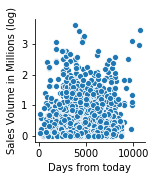

In [46]:
import seaborn as sns
sns.pairplot(data=gm,
                  x_vars=['time_delta'], y_vars=['target'])
plt.xlabel('Days from today')
plt.ylabel('Sales Volume in Millions (log)')

In [47]:
gm.columns

Index(['time_delta', 'genre_Action', 'genre_Action-Adventure',
       'genre_Adventure', 'genre_Fighting', 'genre_Misc', 'genre_Others',
       'genre_Platform', 'genre_Puzzle', 'genre_Racing',
       ...
       'Publisher_Warner Bros. Interactive Entertainment',
       'Publisher_Xicat Interactive', 'Publisher_Xing Entertainment',
       'Publisher_Xplosiv', 'Publisher_Xseed Games',
       'Publisher_Zoo Digital Publishing', 'Publisher_Zushi Games',
       'Publisher_others', 'target', 'rank_position'],
      dtype='object', length=239)

In [ ]:
# gm.to_csv('AnalysisData.csv')